In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [ ]:
df=pd.read_csv('housing.csv')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
x=df.drop('median_house_value',axis=1)
y=df['median_house_value']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
train_data=x_train.join(y_train)

In [ ]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
7214,-118.17,34.02,34.0,760.0,219.0,968.0,202.0,1.7813,<1H OCEAN,145000.0
18726,-122.30,40.58,19.0,1043.0,204.0,505.0,183.0,1.6033,INLAND,98800.0
17306,-119.55,34.38,17.0,1951.0,368.0,681.0,350.0,2.7275,<1H OCEAN,500001.0
10586,-117.77,33.70,15.0,1392.0,267.0,681.0,263.0,5.4248,<1H OCEAN,187200.0
16860,-122.43,37.63,15.0,2748.0,997.0,1447.0,901.0,3.5214,NEAR OCEAN,144200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

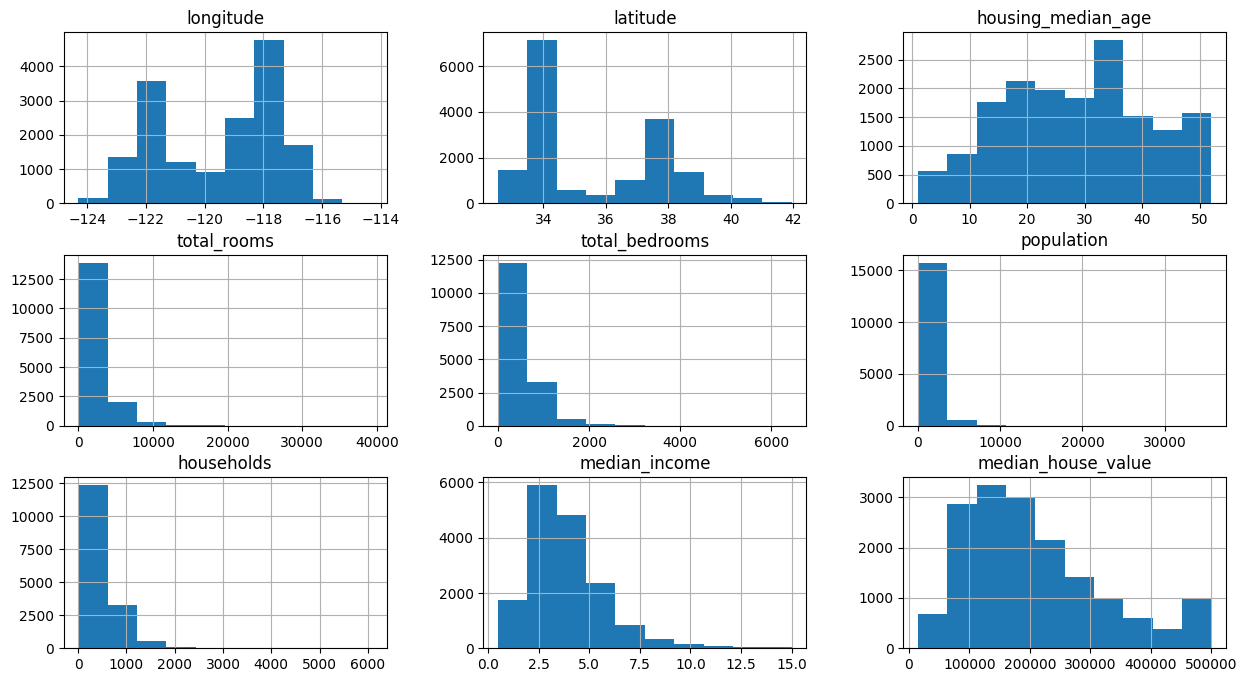

In [ ]:
train_data.hist(figsize=(15,8))

In [ ]:
train_data_num = train_data.drop('ocean_proximity', axis=1)

<Axes: >

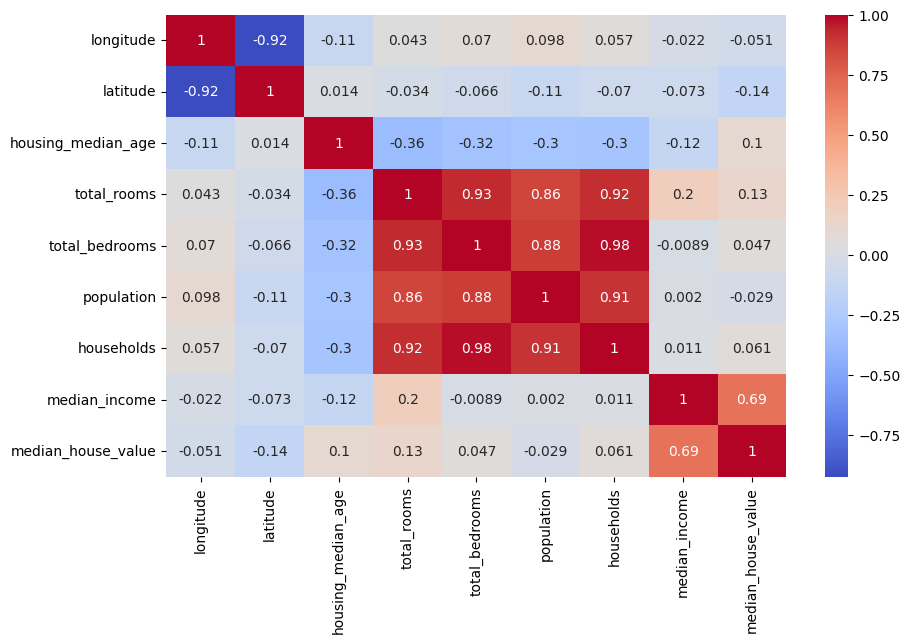

In [ ]:

plt.figure(figsize=(10, 6))
sns.heatmap(train_data_num.corr(), annot=True, cmap='coolwarm')

In [ ]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)



array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

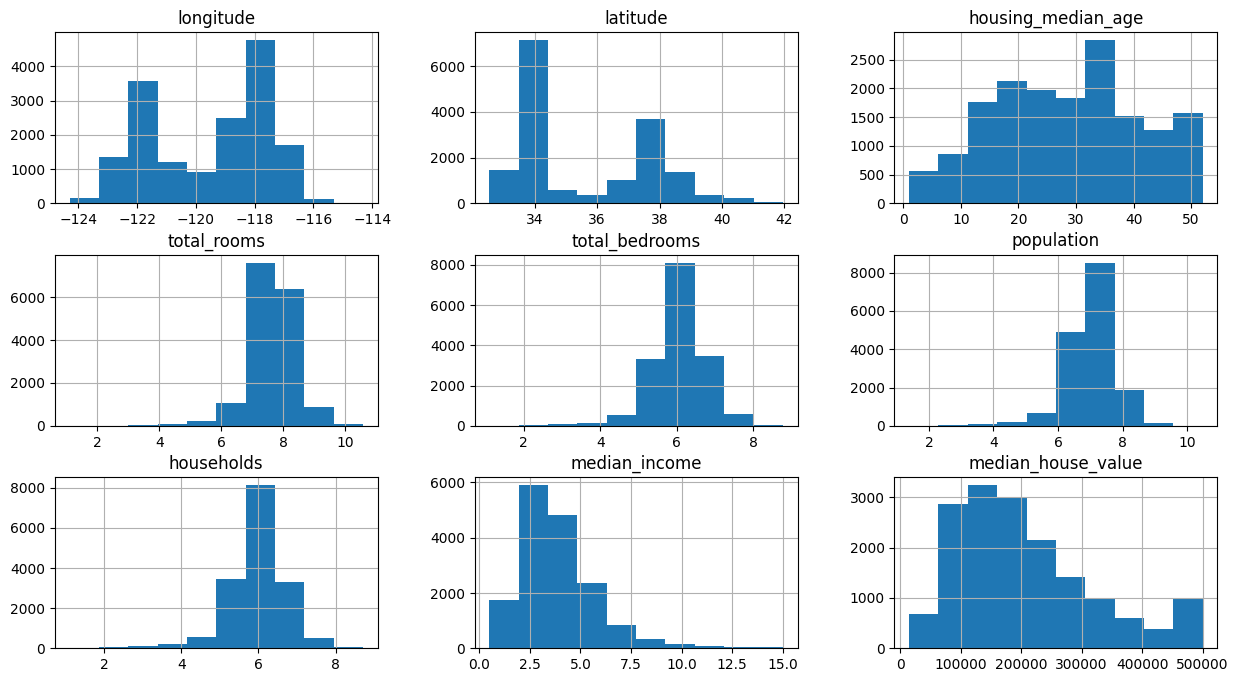

In [ ]:
train_data.hist(figsize=(15,8))

In [ ]:
train_data_num.join(pd.get_dummies(train_data['ocean_proximity'], drop_first=True).astype(int))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
7214,-118.17,34.02,34.0,760.0,219.0,968.0,202.0,1.7813,145000.0,0,0,0,0
18726,-122.30,40.58,19.0,1043.0,204.0,505.0,183.0,1.6033,98800.0,1,0,0,0
17306,-119.55,34.38,17.0,1951.0,368.0,681.0,350.0,2.7275,500001.0,0,0,0,0
10586,-117.77,33.70,15.0,1392.0,267.0,681.0,263.0,5.4248,187200.0,0,0,0,0
16860,-122.43,37.63,15.0,2748.0,997.0,1447.0,901.0,3.5214,144200.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2487,-120.35,36.16,18.0,1519.0,296.0,846.0,272.0,2.7792,85300.0,1,0,0,0
13522,-117.41,34.23,17.0,889.0,131.0,439.0,141.0,6.1426,155000.0,1,0,0,0
18619,-122.02,37.01,20.0,1005.0,138.0,345.0,129.0,10.0968,500001.0,0,0,0,1
12621,-121.53,38.51,20.0,6132.0,1324.0,2595.0,1174.0,3.1607,178900.0,1,0,0,0


<Axes: xlabel='latitude', ylabel='longitude'>

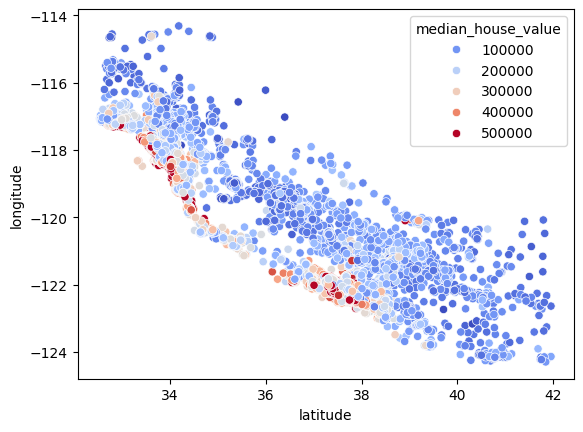

In [ ]:
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue='median_house_value',palette='coolwarm')

In [ ]:
model=RandomForestRegressor()

In [ ]:
x_train,y_train=train_data_num.drop('median_house_value',axis=1),train_data['median_house_value']

In [ ]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
model.score(x_train,y_train)

0.9744185341415295

In [ ]:
test_data=x_test.join(y_test)

In [ ]:
test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)


In [ ]:
test_data_num=test_data.join(pd.get_dummies(test_data['ocean_proximity'], drop_first=True).astype(int))

In [ ]:
test_data_num.drop('ocean_proximity',axis=1,inplace=True)


In [ ]:
x_test,y_test=test_data_num.drop('median_house_value',axis=1),test_data['median_house_value']


In [ ]:
model.fit(x_test,y_test)

RandomForestRegressor()

In [ ]:
model.score(x_test,y_test)

0.9669901300086324

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

RMSE: 20617.529025698932
MAE: 13767.856983117199
R²: 0.9669901300086324


In [ ]:
pickle.dump(model,open('model.pkl','wb'))